## Experiments

In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [2]:
series_reporters = [
    "recovered-hospital",
    "recovered-with-help",
    "recovered-unchecked",
    "fraction-called-in",
    "deaths",
    "number-destroyed-streets-spotted",
    "fraction-destroyed-streets-spotted",
]

single_reporters = [
    'count crossings with [building-status = "collapsed"]',
    'count crossings with [building-status = "high-damage"]',
    "number-destroyed-streets",
]

In [3]:
replications = 25
exp_nr = 6
exp_names = ["no-drones", "short-range", "slow-reroute", "more-drones", "large-view", "fast-reroute", "many-long-range"]
exp_names = [f"{i}_{name}" for i, name in enumerate(exp_names)]
print(exp_names)

['0_no-drones', '1_short-range', '2_slow-reroute', '3_more-drones', '4_large-view', '5_fast-reroute', '6_many-long-range']


In [4]:
# Read all the pickles into a dictionary of dataframes
dfs = {}
for name in exp_names:
    dfs[name] = pd.read_pickle(f"../results/experiments/exp_series_{name}_{replications}r_df.pickle")

In [5]:
KPIs = series_reporters[:3]

df720 = {}
for KPI in KPIs:
    df720[KPI] = pd.DataFrame()
    for name, df in dfs.items():
        df720[KPI][name] = df.iloc[720][KPI]
df720["recovered-hospital"].head(3)

,0_no-drones,1_short-range,2_slow-reroute,3_more-drones,4_large-view,5_fast-reroute,6_many-long-range
0,667.0,594.0,618.0,571.0,612.0,671.0,612.0
1,461.0,622.0,644.0,549.0,625.0,482.0,568.0
2,532.0,587.0,445.0,690.0,524.0,581.0,458.0


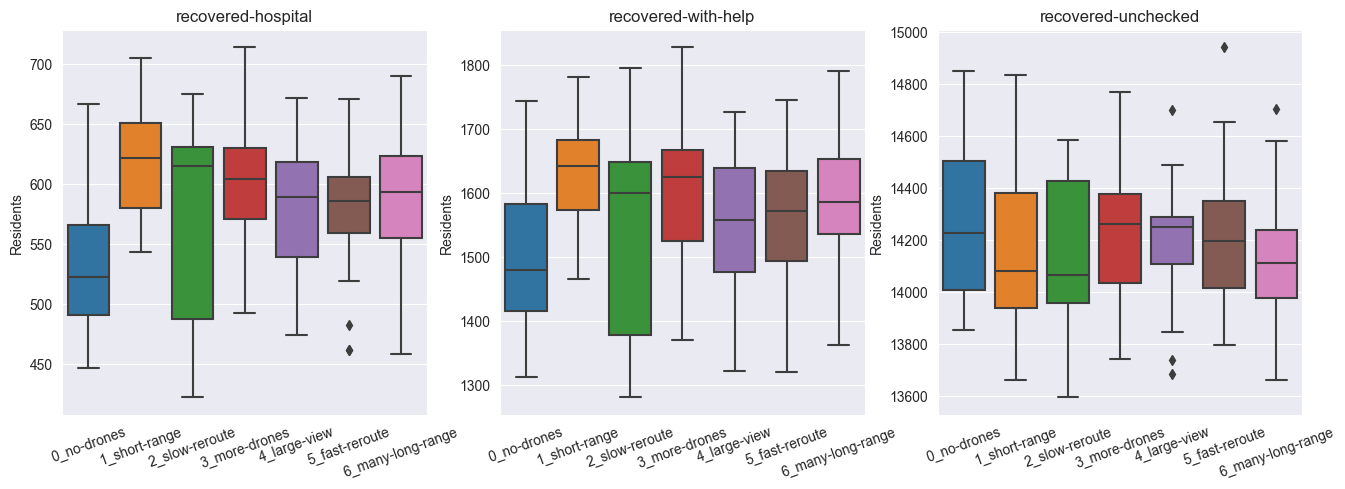

In [6]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(16,5)
g = {}
for i, KPI in enumerate(KPIs):
    g[KPI] = sns.boxplot(df720[KPI], ax=axes[i])
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=20)
    g[KPI].set_title(KPI)
    g[KPI].set_ylabel("Residents")
fig.savefig("../images/recovered_boxplots.svg")

### Dynamics

In [8]:
df_mean = {}
for KPI in KPIs:
    df_mean[KPI] = pd.DataFrame()
    for name, df in dfs.items():
        df_mean[KPI][name] = df[KPI].mean(axis=1)

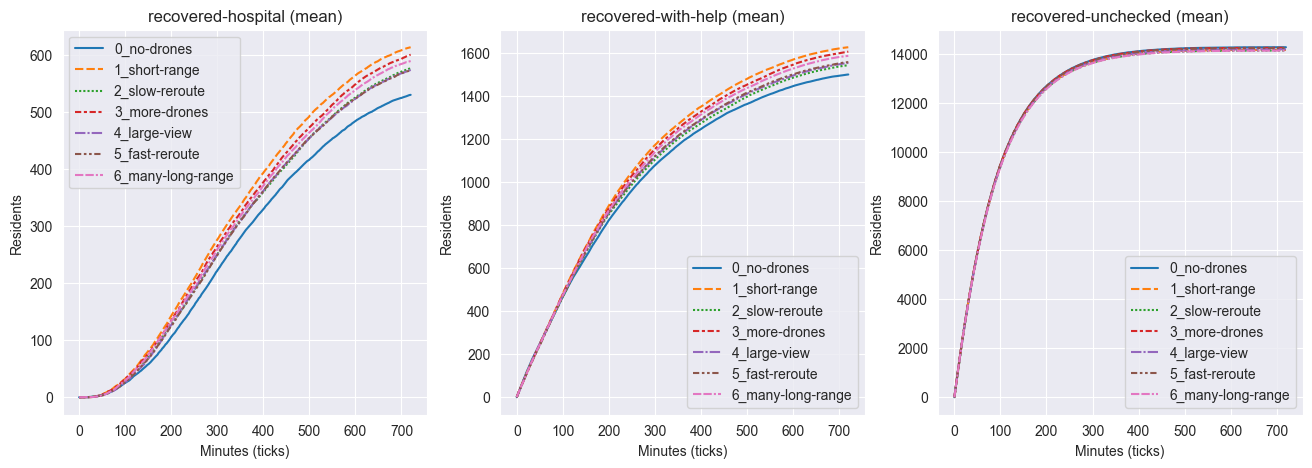

In [9]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(16,5)
g = {}
for i, KPI in enumerate(KPIs):
    g[KPI] = sns.lineplot(df_mean[KPI], ax=axes[i])
    g[KPI].set_title(f"{KPI} (mean)")
    g[KPI].set_ylabel("Residents")
    g[KPI].set_xlabel("Minutes (ticks)")
fig.savefig("../images/recovered_lineplots.svg")

### Streets spotted

In [12]:
df_spotted = pd.DataFrame()
for name, df in dfs.items():
    df_spotted[name] = df[KPI].mean(axis=1)
df_spotted

,0_no-drones,1_short-range,2_slow-reroute,3_more-drones,4_large-view,5_fast-reroute,6_many-long-range
0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1.0,144.64,142.16,137.24,143.12,143.04,146.80,141.32
2.0,285.12,287.44,278.40,284.92,284.88,290.56,283.92
3.0,428.64,429.76,416.64,424.48,425.40,432.40,425.48
4.0,569.96,572.92,557.64,567.96,560.44,574.32,566.24
...,...,...,...,...,...,...,...
716.0,14259.60,14151.48,14124.96,14236.80,14176.08,14227.84,14119.32
717.0,14259.60,14151.48,14124.96,14236.80,14176.08,14227.84,14119.32
718.0,14259.64,14151.60,14124.96,14236.84,14176.08,14227.84,14119.36
719.0,14259.68,14151.60,14125.04,14236.84,14176.08,14227.88,14119.36


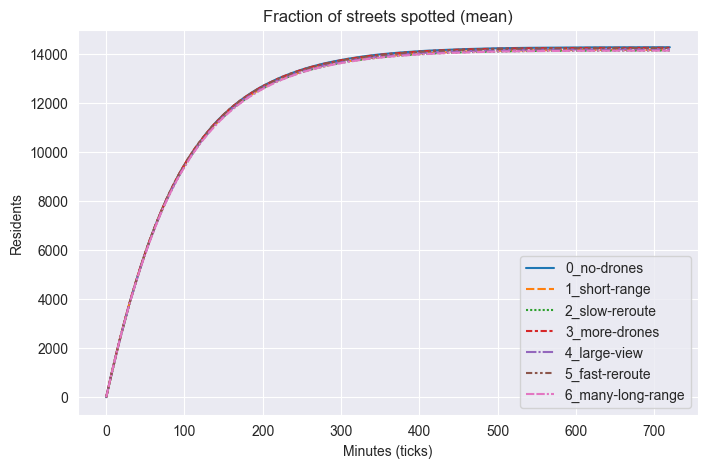

In [15]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(8,5)

gs = sns.lineplot(df_mean[KPI], ax=axes)
gs.set_title(f"Fraction of streets spotted (mean)")
gs.set_ylabel("Residents")
gs.set_xlabel("Minutes (ticks)")
fig.savefig("../images/spotted_lineplots.svg")